**API** **DE THE COVID TRACKING PROJECT EN THE ATLANTIC** 



In [4]:
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno 
import json

In [2]:
# Especificamos la URL de solicitud para la API de "The COVID Tracking Project"

url = 'https://api.covidtracking.com/v1/us/daily.json'

# Enviamos la solicitud a la API y recibimos los datos de respuesta
response = requests.get(url)

# Analizamos los datos JSON de respuesta en un objeto de diccionario de Python
data = response.json()

# Mostramos los datos de respuesta
print(data)

[{'date': 20210307, 'states': 56, 'positive': 28756489, 'negative': 74582825, 'pending': 11808, 'hospitalizedCurrently': 40199, 'hospitalizedCumulative': 776361, 'inIcuCurrently': 8134, 'inIcuCumulative': 45475, 'onVentilatorCurrently': 2802, 'onVentilatorCumulative': 4281, 'dateChecked': '2021-03-07T24:00:00Z', 'death': 515151, 'hospitalized': 776361, 'totalTestResults': 363825123, 'lastModified': '2021-03-07T24:00:00Z', 'recovered': None, 'total': 0, 'posNeg': 0, 'deathIncrease': 842, 'hospitalizedIncrease': 726, 'negativeIncrease': 131835, 'positiveIncrease': 41835, 'totalTestResultsIncrease': 1170059, 'hash': 'a80d0063822e251249fd9a44730c49cb23defd83'}, {'date': 20210306, 'states': 56, 'positive': 28714654, 'negative': 74450990, 'pending': 11783, 'hospitalizedCurrently': 41401, 'hospitalizedCumulative': 775635, 'inIcuCurrently': 8409, 'inIcuCumulative': 45453, 'onVentilatorCurrently': 2811, 'onVentilatorCumulative': 4280, 'dateChecked': '2021-03-06T24:00:00Z', 'death': 514309, 'hos

In [3]:
print(json.dumps(data, indent=4))

[
    {
        "date": 20210307,
        "states": 56,
        "positive": 28756489,
        "negative": 74582825,
        "pending": 11808,
        "hospitalizedCurrently": 40199,
        "hospitalizedCumulative": 776361,
        "inIcuCurrently": 8134,
        "inIcuCumulative": 45475,
        "onVentilatorCurrently": 2802,
        "onVentilatorCumulative": 4281,
        "dateChecked": "2021-03-07T24:00:00Z",
        "death": 515151,
        "hospitalized": 776361,
        "totalTestResults": 363825123,
        "lastModified": "2021-03-07T24:00:00Z",
        "recovered": null,
        "total": 0,
        "posNeg": 0,
        "deathIncrease": 842,
        "hospitalizedIncrease": 726,
        "negativeIncrease": 131835,
        "positiveIncrease": 41835,
        "totalTestResultsIncrease": 1170059,
        "hash": "a80d0063822e251249fd9a44730c49cb23defd83"
    },
    {
        "date": 20210306,
        "states": 56,
        "positive": 28714654,
        "negative": 74450990,
        "

**Creación del DataFrame**

In [5]:
Casos=pd.DataFrame(data)
Casos.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,None,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0


Mediante la ejecución de la código anterior se creó el DataFrame denominado CASOS, el cual contiene los datos que se encuentran en la API. A partir de una análisis del mismo se puede establecer que el campo "HASH" no aportará información relevamente para el análisis, por lo que el mismo será eliminado.

**SE RENOMBRAN LOS CAMPOS**

In [6]:
Casos= Casos.rename(columns={'date':'Fecha' , 
                     'states':'Estado' , 
                     'positive':'Positivos', 
                     'negative':'Negativos' , 
                     'pending':'Pendiente' , 
                     'hospitalizedCurrently':'Hospitalizado Actualmente' , 
                     'hospitalizedCumulative':'Hospitalizado Acumulativo' , 
                     'inIcuCurrently':'Actualmente UCI' ,
                     'inIcuCumulative':'Acumulado en UCI' , 
                     'onVentilatorCurrently':'Con Ventilación' , 
                     'dateChecked':'Fecha Comprobada' ,
                     'death':'Muertes' , 
                     'deathIncrease':'Incremento de Muerte' , 
                     'hospitalized':'Hospitalizado' ,
                     'hospitalizedIncrease':'Aumento de Hospitalizados' , 
                     'lastModified':'Última Modificación' ,
                     'negativeIncrease':'Aumento de Negativos' , 
                     'onVentilatorCumulative':'Han estado con ventilación' ,
                     'positiveIncrease':'Aumento Positivos' , 
                     'recovered':'Recuperados' , 
                     'total':'Total' ,
                     'totalTestResults':'Resultado de pruebas totales' , 
                     'totalTestResultsIncrease':'Incremento de resultados de pruebas'
            })

**ANÁLISIS EXPLORATORIO**

In [7]:
Casos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Fecha                                420 non-null    int64  
 1   Estado                               420 non-null    int64  
 2   Positivos                            419 non-null    float64
 3   Negativos                            372 non-null    float64
 4   Pendiente                            369 non-null    float64
 5   Hospitalizado Actualmente            356 non-null    float64
 6   Hospitalizado Acumulativo            369 non-null    float64
 7   Actualmente UCI                      347 non-null    float64
 8   Acumulado en UCI                     348 non-null    float64
 9   Con Ventilación                      348 non-null    float64
 10  Han estado con ventilación           341 non-null    float64
 11  Fecha Comprobada                

A partir de lo anterior se puede tener noción de los tipos de datos que se encuentra en la API y de las variables que la conforman. Además, ya nos da una idea de que la variable "RECUPERADOS" es un campo cuyos valores son nulos, lo que implicará realizar una posterior eliminación de dicho campo.

In [8]:
Casos.describe()

,Fecha,Estado,Positivos,Negativos,Pendiente,Hospitalizado Actualmente,Hospitalizado Acumulativo,Actualmente UCI,Acumulado en UCI,Con Ventilación,...,Muertes,Hospitalizado,Resultado de pruebas totales,Total,posNeg,Incremento de Muerte,Aumento de Hospitalizados,Aumento de Negativos,Aumento Positivos,Incremento de resultados de pruebas
count,4.200000e+02,420.000000,4.190000e+02,3.720000e+02,369.000000,356.000000,369.000000,347.000000,348.000000,348.000000,...,392.000000,369.000000,4.200000e+02,420.0,420.0,420.000000,420.000000,420.000000,420.000000,4.200000e+02
mean,2.020218e+07,49.476190,8.116687e+06,3.030351e+07,9617.308943,57987.117978,310817.140921,12059.227666,21059.344828,3975.298851,...,187210.668367,310817.140921,1.073369e+08,0.0,0.0,1226.550000,1848.478571,177578.154762,68467.830952,8.662503e+05
std,3.472227e+03,16.896764,8.967432e+06,2.407815e+07,9920.899709,31898.555998,235557.870159,5668.415483,13572.638376,2191.080602,...,142331.657380,235557.870159,1.129172e+08,0.0,0.0,1070.129644,1708.460481,121544.473208,68682.221496,6.579460e+05
min,2.020011e+07,1.000000,0.000000e+00,2.000000e+00,106.000000,325.000000,4.000000,1299.000000,74.000000,167.000000,...,0.000000,4.000000,0.000000e+00,0.0,0.0,0.000000,-2858.000000,-658774.000000,0.000000,0.000000e+00
25%,2.020043e+07,56.000000,1.004386e+06,6.753778e+06,3377.000000,35100.500000,123250.000000,7495.500000,9900.250000,2168.500000,...,86911.750000,123250.000000,5.888598e+06,0.0,0.0,439.750000,765.750000,79236.750000,22462.500000,2.388558e+05
50%,2.020081e+07,56.000000,5.044337e+06,2.757246e+07,9939.000000,48811.000000,280138.000000,10114.000000,18797.500000,3186.500000,...,169118.500000,280138.000000,6.839699e+07,0.0,0.0,1016.000000,1490.000000,206620.000000,44664.500000,8.223685e+05
75%,2.020112e+07,56.000000,1.234137e+07,5.084301e+07,11957.000000,70519.250000,481309.000000,15596.500000,32998.500000,5828.500000,...,258912.250000,481309.000000,1.854937e+08,0.0,0.0,1642.500000,2467.000000,260621.000000,89684.250000,1.401706e+06
max,2.021031e+07,56.000000,2.875649e+07,7.458282e+07,65698.000000,132474.000000,776361.000000,23912.000000,45475.000000,8004.000000,...,515151.000000,776361.000000,3.638251e+08,0.0,0.0,5427.000000,17155.000000,480256.000000,295121.000000,2.309884e+06


In [9]:
Casos.isnull().sum()

Fecha                                    0
Estado                                   0
Positivos                                1
Negativos                               48
Pendiente                               51
Hospitalizado Actualmente               64
Hospitalizado Acumulativo               51
Actualmente UCI                         73
Acumulado en UCI                        72
Con Ventilación                         72
Han estado con ventilación              79
Fecha Comprobada                         0
Muertes                                 28
Hospitalizado                           51
Resultado de pruebas totales             0
Última Modificación                      0
Recuperados                            420
Total                                    0
posNeg                                   0
Incremento de Muerte                     0
Aumento de Hospitalizados                0
Aumento de Negativos                     0
Aumento Positivos                        0
Incremento 

Esto viene a completar lo mencionado con anterioridad sobre los campos con valores nulos, proporcionando la cantidad de dichos valores que presenta cada campo. Tal cual se dijo, la variable "RECUPERADOS" contiene en su totalidad valores nulos.

**VISUALIZACIONES**

A continuación se realizan representaciones gráficas de lo antedicho.

<Axes: >

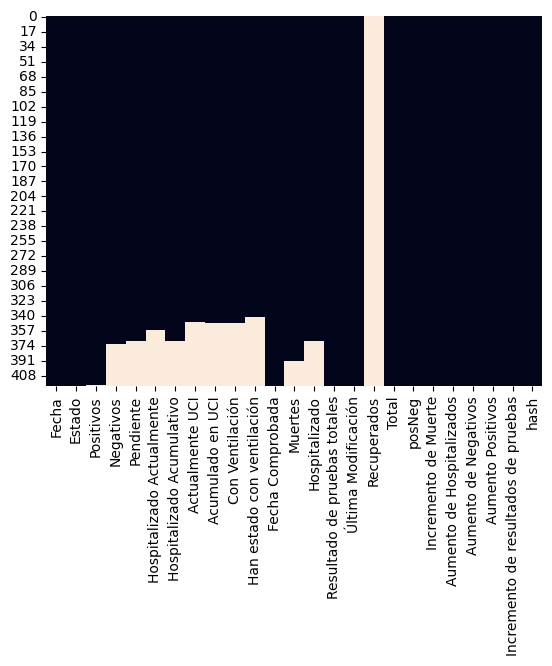

In [10]:
sns.heatmap(Casos.isnull(), cbar=False)

<Axes: >

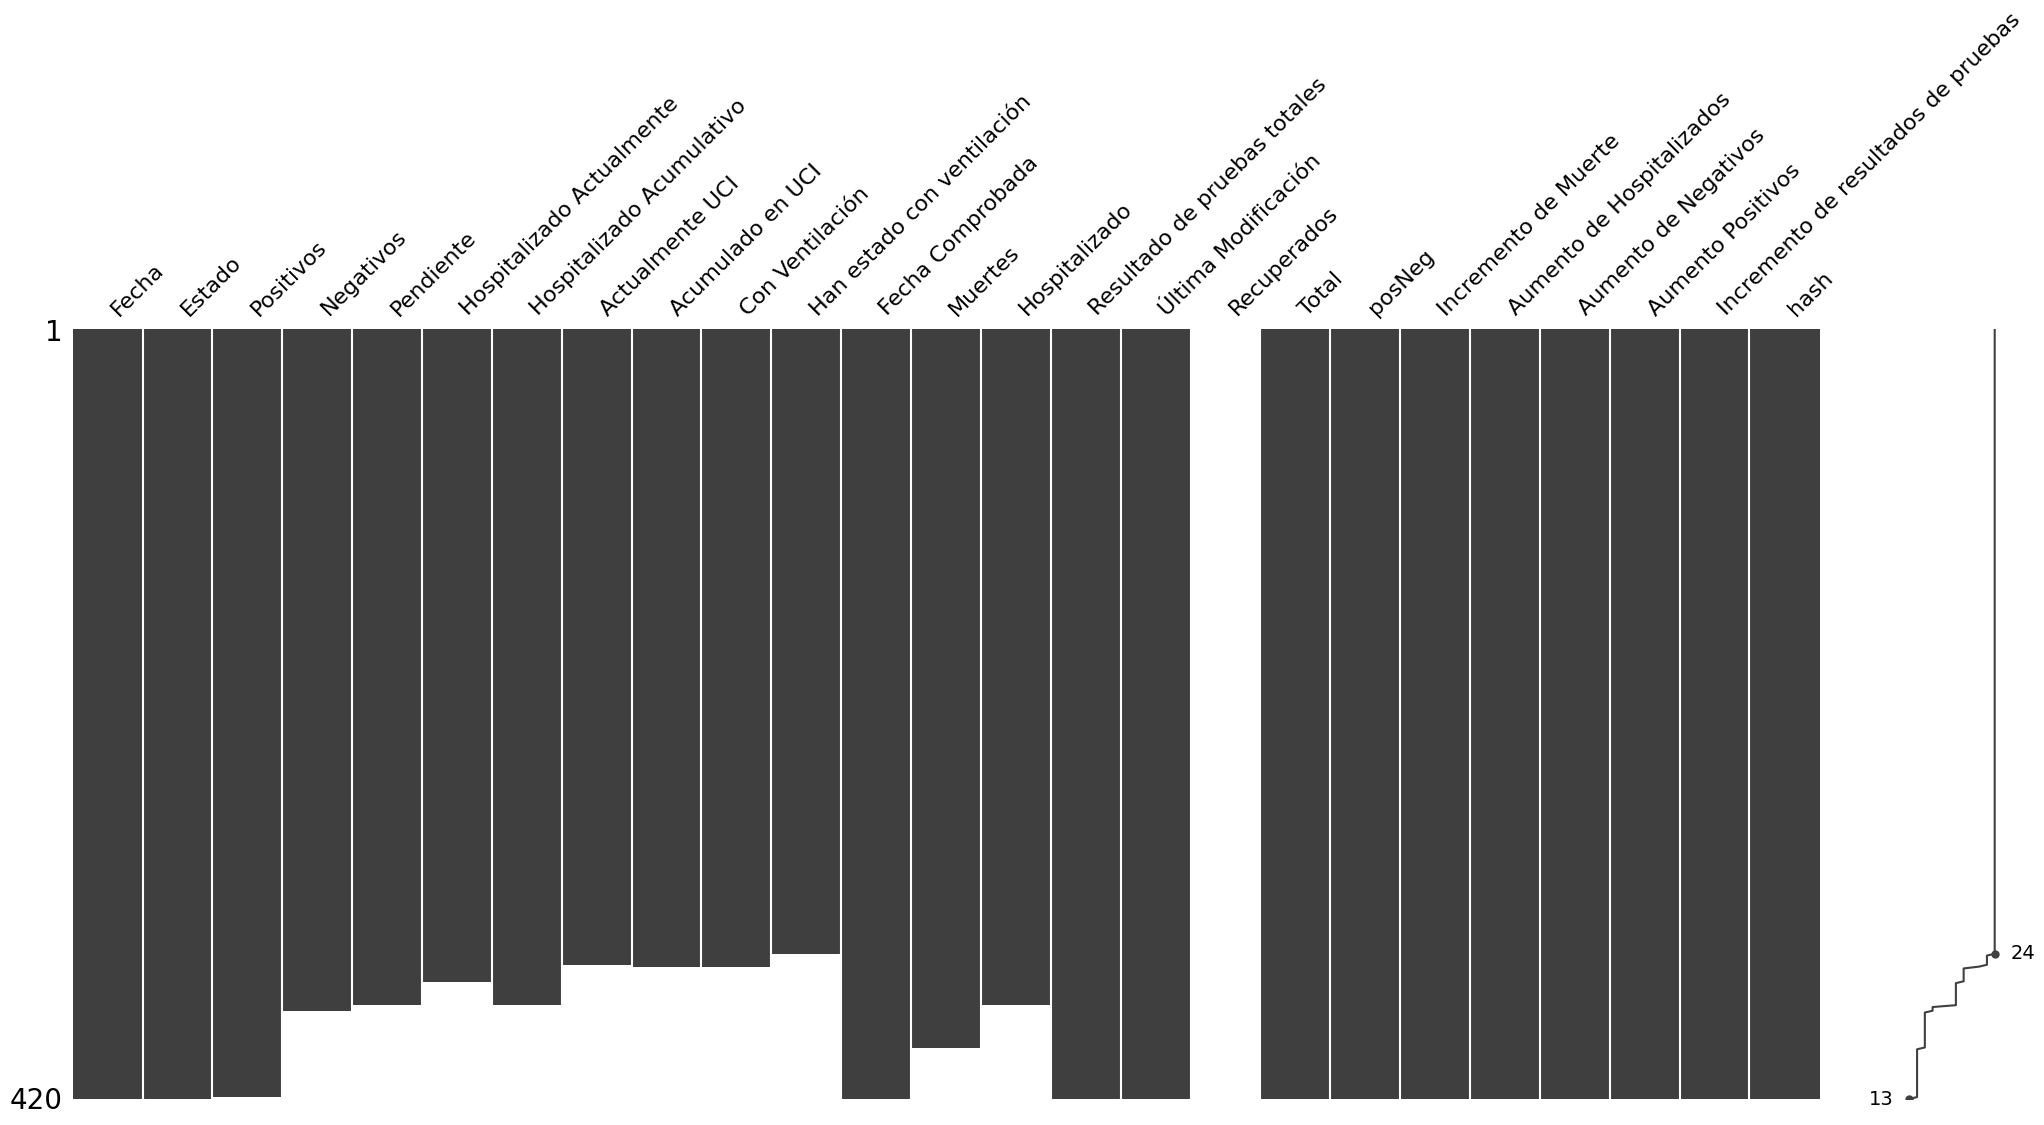

In [12]:
msno.matrix(Casos)

A partir de lo analizado anteriormente, se tiene ya los primeros pasos a relaizar sobre el conjunto de datos, el cual comprenderá la limpieza y transformación de los mismos para mejorar su presentación y así poder realizar un análisis de mayor calidad de los mismos, que permita obtener información de valor para la toma de decisiones que puedan realizarse en base a los resultados que se obtengan.